**Project Description - Bank Churn Prediction**

**Bank Churn Prediction Objective:**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Context:** 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Data Description: **

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Data Dictionary:**

•	RowNumber: Row number.

•	CustomerId: Unique identification key for different customers.

•	Surname: Surname of the customer

•	Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

•	Geography: The country to which the customer belongs.

•	Gender: The gender of the customer.

•	Age: Age of the customer.

•	Tenure: The period of time a customer has been associated with the bank.

•	Balance: The account balance (the amount of money deposited in the bank 
account) of the customer.

•	NumOfProducts: How many accounts, bank account affiliated products the person has.

•	HasCrCard: Does the customer have a credit card through the bank?

•	IsActiveMember: Subjective, but for the concept

•	EstimatedSalary: Estimated salary of the customer.

•	Exited: Did they leave the bank after all?

**Points Distribution:**

The points distribution for this case is as follows:
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)


In [114]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
bankData = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 6/bank.csv')
bankData

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [140]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
bankData.shape

(10000, 14)

In [77]:
bankData.isnull().values.any() 

False

In [ ]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(bankData)
prof.to_file(output_file='/content/drive/My Drive/Colab Notebooks/Project 6/bankDataReport.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
tf.__version__

'2.4.0'

In [62]:
bankData6 = bankData[bankData.Tenure == 6]

#df[df.unknown == 1]

In [63]:
bankData6.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0
33,34,15659428,Maggard,520,Spain,Female,42,6,0.00,2,1,1,34410.55,0
39,40,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0


In [64]:
bankData6.shape

(967, 14)

In [65]:
#Dropping unique columns - rowNumber, CustomerId, Surname, Balance

bankData6  = bankData6.drop(columns=["RowNumber", "CustomerId", "Surname", "Balance"])

#Dropping not needed columns for this project - Geograpy, Gender.

bankData6  = bankData6.drop(columns=["Geography", "Gender" ])


In [66]:
bankData6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 10 to 9985
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      967 non-null    int64  
 1   Age              967 non-null    int64  
 2   Tenure           967 non-null    int64  
 3   NumOfProducts    967 non-null    int64  
 4   HasCrCard        967 non-null    int64  
 5   IsActiveMember   967 non-null    int64  
 6   EstimatedSalary  967 non-null    float64
 7   Exited           967 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 68.0 KB


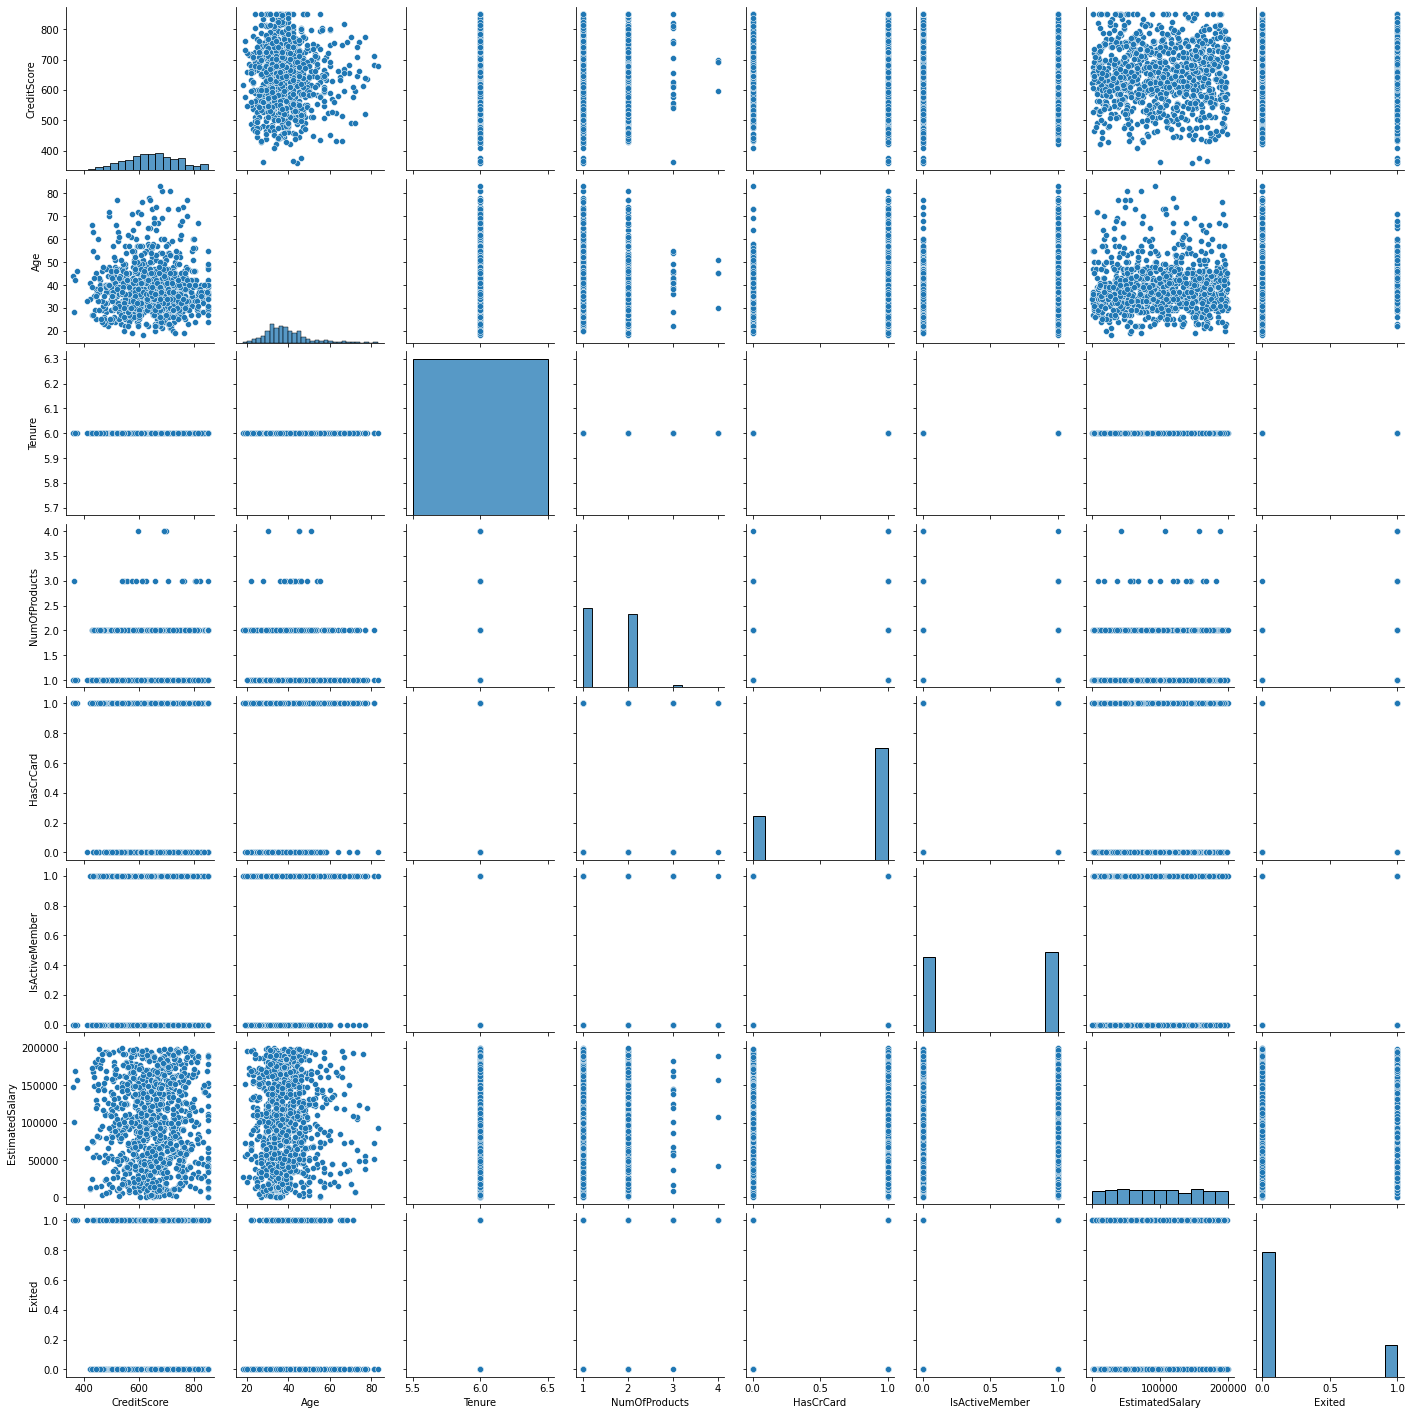

In [ ]:
#bivariate analysis

import seaborn as sns

sns.pairplot(data=bankData6)

In [ ]:
#convert geography to numric values 

#bankData['geography'] = bankData['Geography'].map(lambda x: {1: 'France', 2: 'Spain', 3: 'Germany'}.get(x))

#convert the numeric values to one-hot code to remove the order

#bankData = pd.get_dummies(bankData, columns=['Geography'])


In [ ]:
#convert gender to numric values 

#bankData['gender'] = bankData['Gender'].map(lambda x: {1: 'Male', 2: 'Female'}.get(x))

#convert the numeric values to one-hot code to remove the order

#bankData = pd.get_dummies(bankData, columns=['Gender'])


In [ ]:
#Remove geography and gender columns after hot coding

#bankData  = bankData.drop(columns=["geography", "gender"])


In [67]:


X_bankData = bankData6.iloc[:, :-1]
y_bankData = bankData6.iloc[:, -1]


In [68]:
X_bankData.shape

(967, 7)

In [69]:
X_bankData.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10,528,31,6,2,0,0,80181.12
18,587,45,6,1,0,0,158684.81
19,726,24,6,2,1,1,54724.03
33,520,42,6,2,1,1,34410.55
39,582,41,6,2,0,1,178074.04


In [70]:
y_bankData.shape

(967,)

In [71]:
y_bankData.head()

10    0
18    0
19    0
33    0
39    0
Name: Exited, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bankData, y_bankData, test_size = 0.3, random_state = 14)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 7)
(291, 7)
(676,)
(291,)


In [104]:
#from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train)

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.5).fit(X_train)
X_train = binarizer.transform(X_train)

In [90]:
X_train.head()

AttributeError: ignored

In [105]:
#Creating the model

from tensorflow.keras import Sequential

bankModel = Sequential()


In [106]:
#Creating Layers with Activations

from tensorflow.keras.layers import Dense

# Add the input layer 
bankModel.add(Dense(200, input_shape = (7,), activation = 'tanh'))
# Add the input layer 
bankModel.add(Dense(150, activation = 'tanh'))
# Add a hidden layer 
bankModel.add(Dense(32, activation = 'tanh'))
# Add a hidden layer
bankModel.add(Dense(12, activation = 'tanh'))
# Add the output layer 
bankModel.add(Dense(1, activation = 'tanh'))

In [107]:
#Optimizer Loss
from tensorflow.keras import optimizers, metrics

bankModel.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics=['binary_accuracy'])


In [108]:
#Fitting the model

bankModel.fit(X_train, y_train, batch_size =50, epochs = 15, verbose = 1)


Epoch 1/15
14/14 [==============================] - 1s 2ms/step - loss: 1.4271 - binary_accuracy: 0.3864
Epoch 2/15
14/14 [==============================] - 0s 2ms/step - loss: 1.9320 - binary_accuracy: 0.8099
Epoch 3/15
14/14 [==============================] - 0s 2ms/step - loss: 1.3357 - binary_accuracy: 0.7479
Epoch 4/15
14/14 [==============================] - 0s 2ms/step - loss: 0.8746 - binary_accuracy: 0.7894
Epoch 5/15
14/14 [==============================] - 0s 2ms/step - loss: 0.7997 - binary_accuracy: 0.8012
Epoch 6/15
14/14 [==============================] - 0s 2ms/step - loss: 0.8879 - binary_accuracy: 0.7896
Epoch 7/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5369 - binary_accuracy: 0.7920
Epoch 8/15
14/14 [==============================] - 0s 3ms/step - loss: 0.5225 - binary_accuracy: 0.7893
Epoch 9/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4748 - binary_accuracy: 0.8202
Epoch 10/15
14/14 [==============================] - 0s

In [109]:
bankModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               1600      
_________________________________________________________________
dense_21 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                4832      
_________________________________________________________________
dense_23 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 13        
Total params: 36,991
Trainable params: 36,991
Non-trainable params: 0
_________________________________________________________________


In [110]:
X_test = preprocessing.normalize(X_test)

In [111]:
results = bankModel.evaluate(X_test, y_test.values)


10/10 [==============================] - 0s 2ms/step - loss: 0.5474 - binary_accuracy: 0.7973


In [121]:
Y_predict = (bankModel.predict(X_test)[:,1] >= 0.5).astype(bool)


IndexError: ignored

In [120]:
#Printing the scores and confusion matrix


cm = metrics.confusion_matrix(y_test.values,Y_predict.round())
print(cm)

#metrics.plot_confusion_matrix(bankModel,y_test,  Y_predict.round(), values_format='d',cmap='Oranges')

[[232   0]
 [ 59   0]]


In [136]:
print(bankModel.metrics_names)
print(results)   

['loss', 'binary_accuracy']
[3.127394914627075, 0.7972508668899536]


In [116]:
print('Recall_score: ' , metrics.recall_score(y_test,Y_predict))
print('Precision_score: ' , (metrics.precision_score(y_test, Y_predict)))
print('F-score: ' ,(metrics.f1_score(y_test,Y_predict)))
print('Confusion Matrix:  ', metrics.confusion_matrix(y_test, Y_predict))

#metrics.plot_confusion_matrix(bankModel,y_test,  Y_predict, values_format='d',cmap='Oranges')

ValueError: ignored

In [ ]:
loss, acc = bankModel.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.798
Loss: 0.503
